<a href="https://colab.research.google.com/github/hyulianton/BigData/blob/main/Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mengingat dataset dari scikit-learn pada dasarnya berukuran kecil dan muat di memori, kita akan menggunakan dataset tersebut untuk mendemonstrasikan *konsep* dan *metode* EDA menggunakan Pandas (yang biasanya digunakan untuk analisis detail pada *sampel* data di Big Data). Kita juga akan menyisipkan penjelasan *konseptual* tentang bagaimana operasi serupa dilakukan menggunakan Spark SQL untuk data skala besar, meskipun kode Spark SQL-nya sendiri tidak akan bisa dijalankan tanpa klaster Spark.

Kita akan gunakan dataset `load_diabetes` dari scikit-learn, yang memiliki fitur numerik dan cocok untuk demonstrasi statistik, distribusi, dan korelasi. Kita juga akan mensimulasikan missing values untuk mendemonstrasikan penanganannya.

Pastikan library berikut sudah terinstall (`pip install scikit-learn pandas numpy matplotlib seaborn`):

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
import random # Untuk simulasi missing values

# Set style visualisasi
sns.set_style("whitegrid")

# --- Load Dataset dan Konversi ke Pandas DataFrame ---
# Di sini, kita memuat dataset kecil dari scikit-learn.
# Anggaplah ini adalah "SAMPEL" data yang representative
# dari dataset Big Data kita yang asli.
# Kita menggunakan Pandas DataFrame karena akan mendemonstrasikan
# operasi EDA yang cepat dan interaktif pada data yang muat di memori.

print("Memuat dataset diabetes dari scikit-learn...")
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
target = pd.DataFrame(diabetes.target, columns=['target'])
df = pd.concat([data, target], axis=1)

print("\nDataset berhasil dimuat. Berikut 5 baris pertama (seperti 'pd.head()' pada sampel):")
print(df.head())

print("\nInformasi dasar dataset (seperti 'pd.info()' pada sampel):")
df.info()

# --- Koneksi ke Big Data ---
# Pada Big Data, dataset 'diabetes' ini akan tersimpan di sistem terdistribusi
# seperti HDFS atau S3. Kita tidak bisa langsung memuatnya ke Pandas.
# Kita akan menggunakan Spark SQL untuk MEMUAT dan mengambil sampel atau melakukan AGREGASI awal.
# Contoh sintaks PySpark (tidak runnable tanpa Spark):
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName("EDA_Example").getOrCreate()
# spark_df = spark.read.parquet("hdfs://path/to/big_diabetes_data.parquet")
# spark_df.printSchema() # Cek skema di Spark
# spark_df.show(5) # Tampilkan 5 baris pertama (ini juga hanya sampel!)

Memuat dataset diabetes dari scikit-learn...

Dataset berhasil dimuat. Berikut 5 baris pertama (seperti 'pd.head()' pada sampel):
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Informasi dasar dataset (seperti 'pd.info()' pada sampel):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #

---

**Contoh Program 1: Ringkasan Statistik Dasar (Menggunakan Pandas pada Sampel)**

Ini mendemonstrasikan bagaimana mendapatkan ringkasan statistik cepat pada data yang sudah ada di Pandas DataFrame (dalam konteks Big Data, ini adalah sampel atau hasil agregasi).

In [5]:
print("\n--- Contoh 1: Ringkasan Statistik Dasar (Pandas di Sampel) ---")

# Menggunakan .describe() untuk statistik cepat pada kolom numerik
# Pada sampel kecil/data in-memory, ini sangat cepat.
# Pada Big Data, ini seperti Spark DataFrame .describe() atau .summary()
# yang beroperasi secara terdistribusi di seluruh dataset asli.
print("\nStatistik deskriptif kolom numerik (Pandas .describe()):")
print(df.describe())

# Mengakses statistik spesifik
print(f"\nRata-rata BMI (Pandas .mean()): {df['bmi'].mean():.16f}")
print(f"Median BMI (Pandas .median()): {df['bmi'].median():.16f}")
print(f"Standard Deviasi Tekanan Darah (Pandas .std()): {df['bp'].std():.3f}")
print(f"Percentil ke-75 Target (Pandas .quantile()): {df['target'].quantile(0.75):.3f}")

# Untuk data kategorikal (kita tidak punya di dataset ini, tapi contoh):
# df['nama_kolom_kategori'].value_counts()

# --- Koneksi ke Big Data ---
# Menghitung statistik ini pada Big Data memerlukan Spark SQL/DataFrame API.
# Contoh sintaks PySpark (tidak runnable):
# spark_df.describe('bmi', 'bp', 'target').show()
# spark_df.selectExpr("avg(bmi)", "stddev(bp)", "percentile_approx(target, 0.75)").show()
# Penjelasan: Spark mendistribusikan perhitungan jumlah (count) dan sum ke worker node,
# lalu mengagregasinya di akhir. Untuk median/percentile, Spark menggunakan algoritma aproksimasi
# seperti approxQuantile karena pengurutan data masif sangat mahal.


--- Contoh 1: Ringkasan Statistik Dasar (Pandas di Sampel) ---

Statistik deskriptif kolom numerik (Pandas .describe()):
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3

---

**Contoh Program 2: Visualisasi Distribusi Data (Menggunakan Pandas & Matplotlib/Seaborn pada Sampel)**

Visualisasi distribusi seperti histogram dan KDE sangat informatif, dan mudah dibuat menggunakan library visualisasi standar pada Pandas DataFrame yang berukuran kecil/sampel.


--- Contoh 2: Visualisasi Distribusi Data (Pandas + Matplotlib/Seaborn di Sampel) ---


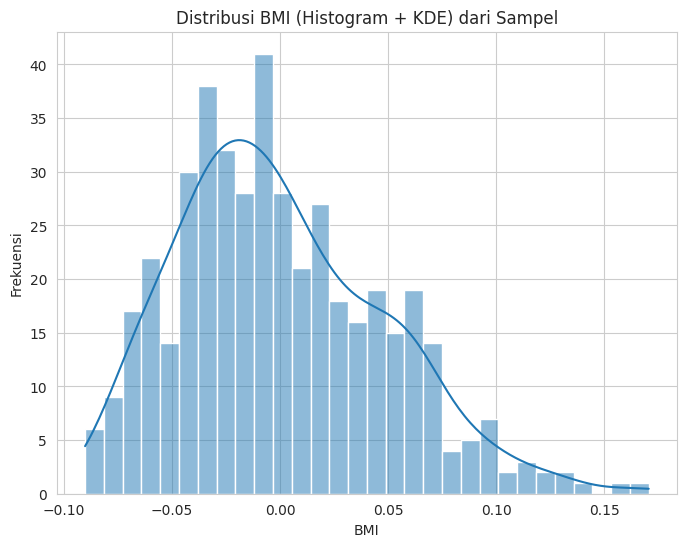

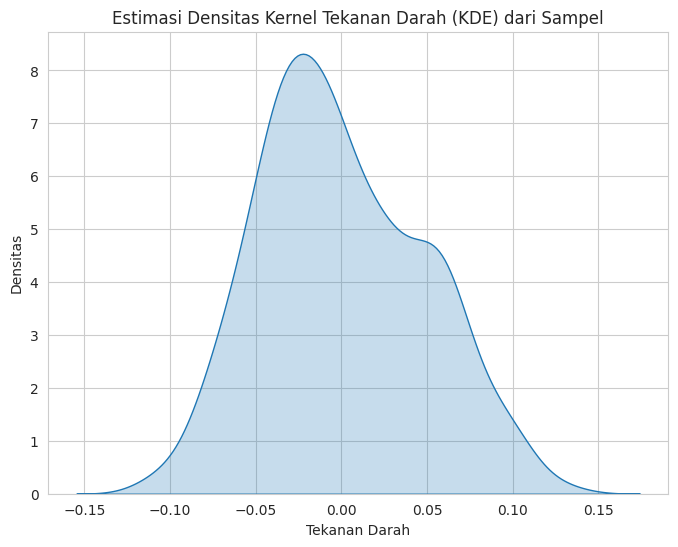

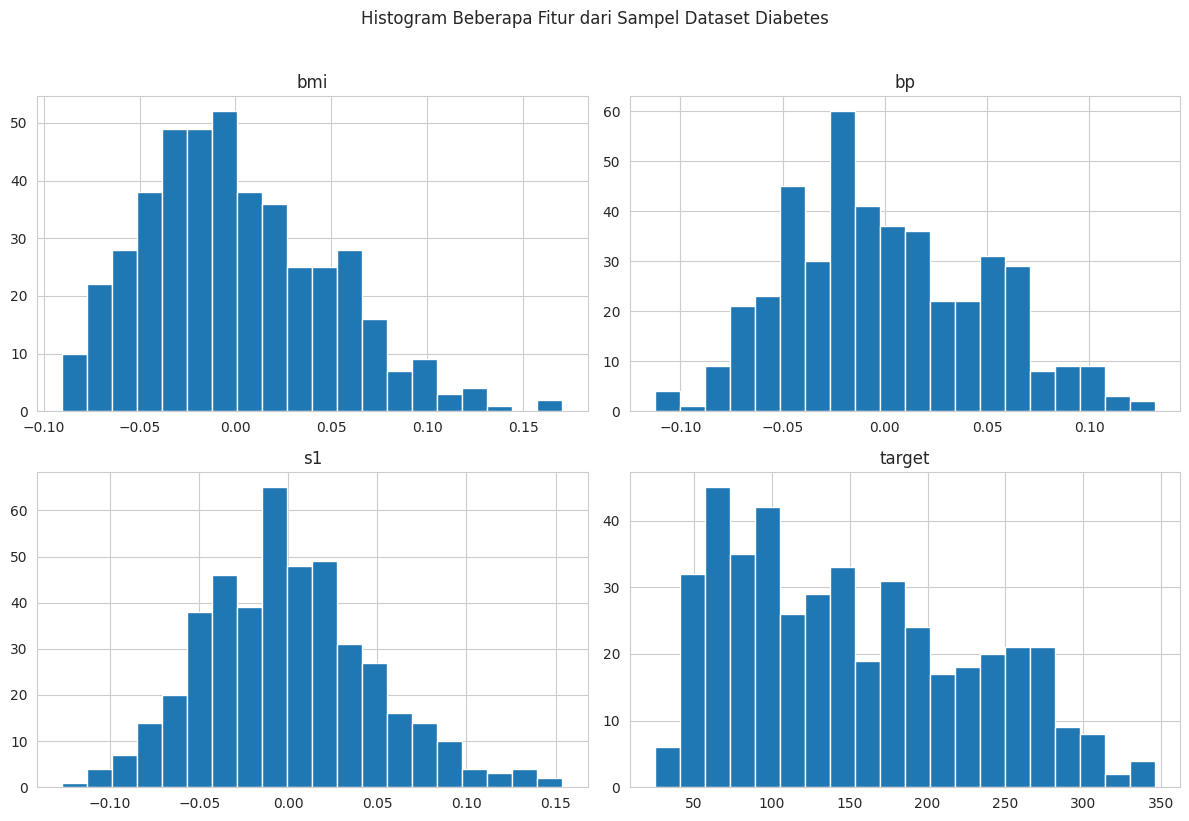

In [6]:
print("\n--- Contoh 2: Visualisasi Distribusi Data (Pandas + Matplotlib/Seaborn di Sampel) ---")

# Histogram untuk kolom 'bmi'
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True, bins=30) # kde=True untuk overlay KDE
plt.title('Distribusi BMI (Histogram + KDE) dari Sampel')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.show()

# KDE plot terpisah untuk kolom 'bp' (Tekanan Darah)
plt.figure(figsize=(8, 6))
sns.kdeplot(df['bp'], fill=True)
plt.title('Estimasi Densitas Kernel Tekanan Darah (KDE) dari Sampel')
plt.xlabel('Tekanan Darah')
plt.ylabel('Densitas')
plt.show()

# Histogram untuk beberapa fitur sekaligus
df[['bmi', 'bp', 's1', 'target']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogram Beberapa Fitur dari Sampel Dataset Diabetes', y=1.02)
plt.tight_layout()
plt.show()

# --- Koneksi ke Big Data ---
# Membuat histogram dari Big Data tidak langsung memplot setiap titik.
# Kita harus menghitung JUMLAH data per BIN menggunakan Spark SQL, lalu memplot hasilnya.
# Contoh sintaks PySpark untuk menghitung bin histogram (tidak runnable):
# from pyspark.sql.functions import floor
# bin_size = 0.05 # Contoh ukuran bin untuk BMI
# bmi_hist_data = spark_df.groupBy(floor(col("bmi")/bin_size)*bin_size).count().orderBy(1)
# # Kemudian kumpulkan 'bmi_hist_data' yang ukurannya sudah kecil ke Pandas
# # dan plot menggunakan bar chart.
# bmi_hist_pandas = bmi_hist_data.toPandas() # Hati-hati jika hasil agregasi masih besar!
# bmi_hist_pandas.set_index('floor(bmi / 0.05) * 0.05').plot(kind='bar')

# KDE dari Big Data sangat mahal. Biasanya dilakukan hanya pada SAMPEL representatif
# menggunakan library seperti yang dicontohkan di atas (Pandas/Seaborn).
# Atau menggunakan algoritma estimasi densitas yang didesain untuk skala besar jika tersedia.

---

**Contoh Program 3: Analisis Missing Values (Simulasi & Menggunakan Pandas pada Sampel)**

Dataset scikit-learn tidak punya missing values, jadi kita simulasikan untuk demonstrasi. Analisis ini dilakukan pada Pandas DataFrame (di konteks Big Data, ini adalah sampel data).


--- Contoh 3: Analisis Missing Values (Simulasi & Pandas di Sampel) ---

DataFrame setelah simulasi missing values:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670       NaN -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Jumlah missing values per kolom di sampel:
age        0
sex        0
bmi       22
bp        22
s1        22
s2         0
s3         0
s4         0
s5         0
s6         0
target

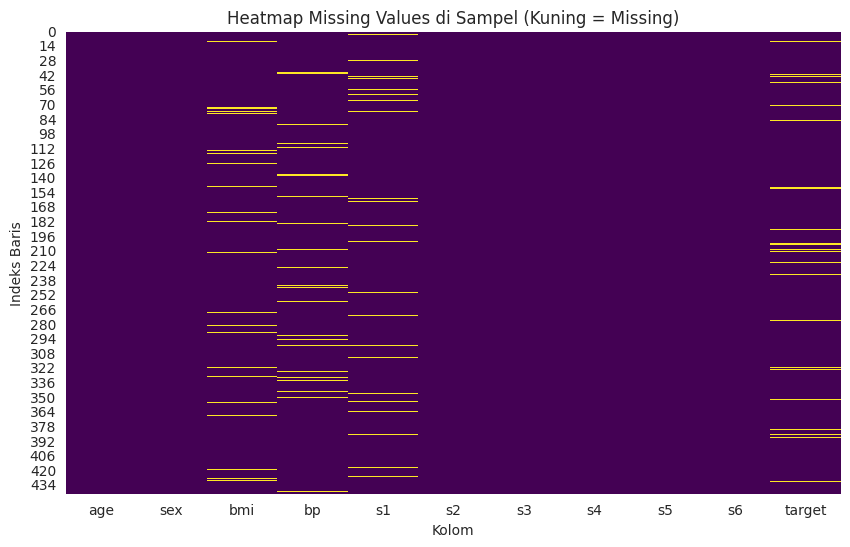


Jumlah baris setelah menghapus baris dengan missing BMI: 420 (dari 442)

DataFrame setelah mengisi missing BMI dengan rata-rata (hanya di sampel):
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670       NaN -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [7]:
print("\n--- Contoh 3: Analisis Missing Values (Simulasi & Pandas di Sampel) ---")

# Simulasikan missing values di beberapa kolom pada df (sampel Pandas DataFrame)
np.random.seed(42) # for reproducibility
for col in ['bmi', 'bp', 's1', 'target']:
    # Ambil indeks acak sebanyak 5% dari total baris
    missing_indices = np.random.choice(df.index, size=int(len(df) * 0.05), replace=False)
    df.loc[missing_indices, col] = np.nan # Set nilai di indeks tersebut menjadi NaN (Not a Number)

print("\nDataFrame setelah simulasi missing values:")
print(df.head())

# Mengecek jumlah missing values per kolom (Pandas .isnull().sum())
print("\nJumlah missing values per kolom di sampel:")
print(df.isnull().sum())

# Visualisasi sederhana pola missingness (hanya relevan untuk dataset kecil/sampel)
# Library seperti missingno sangat bagus untuk ini, tapi butuh install terpisah.
# Kita bisa menggunakan heatmap sederhana dari isnull()
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap Missing Values di Sampel (Kuning = Missing)')
plt.xlabel('Kolom')
plt.ylabel('Indeks Baris')
plt.show()

# Menangani missing values (contoh: hapus baris dengan missing di kolom 'bmi')
# HATI-HATI! Di Big Data, menghapus banyak baris bisa menyebabkan kehilangan data signifikan.
df_dropped = df.dropna(subset=['bmi'])
print(f"\nJumlah baris setelah menghapus baris dengan missing BMI: {len(df_dropped)} (dari {len(df)})")

# Menangani missing values (contoh: isi dengan rata-rata kolom)
# Di Big Data, rata-rata harus dihitung dari SELURUH dataset (menggunakan Spark),
# lalu nilai tersebut digunakan untuk mengisi missing values.
mean_bmi = df['bmi'].mean() # Rata-rata dari SAMPEL yang mungkin sudah punya missing
df_filled = df.fillna({'bmi': mean_bmi})
print("\nDataFrame setelah mengisi missing BMI dengan rata-rata (hanya di sampel):")
print(df_filled.head())

# --- Koneksi ke Big Data ---
# Mengecek missing values di Big Data menggunakan Spark SQL/DataFrame:
# spark_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in spark_df.columns]).show()
# Penjelasan: Menggunakan fungsi agregasi COUNT() bersama dengan kondisi IS NULL atau IS NAN
# yang dieksekusi secara terdistribusi.
# Menghapus/Mengisi missing values di Big Data dilakukan dengan transformasi DataFrame,
# misalnya: spark_df.na.drop(subset=['bmi']) atau spark_df.na.fill({'bmi': mean_bmi_global})
# (mean_bmi_global didapat dari perhitungan Spark .mean() pada data asli).

---

**Contoh Program 4: Analisis Hubungan (Korelasi & Scatter Plot Menggunakan Pandas & Seaborn pada Sampel)**

Analisis korelasi dan scatter plot membantu memahami hubungan antar variabel. Ini mudah dilakukan di Pandas pada sampel data.


--- Contoh 4: Analisis Hubungan (Korelasi & Scatter Plot di Sampel) ---

Matriks Korelasi antar fitur (Pandas .corr() di Sampel):
             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.171982  0.328226  0.257147  0.219243 -0.075181   
sex     0.173737  1.000000  0.071642  0.256187  0.052766  0.142637 -0.379090   
bmi     0.171982  0.071642  1.000000  0.385916  0.269722  0.264307 -0.364442   
bp      0.328226  0.256187  0.385916  1.000000  0.265170  0.189266 -0.180705   
s1      0.257147  0.052766  0.269722  0.265170  1.000000  0.895774  0.043700   
s2      0.219243  0.142637  0.264307  0.189266  0.895774  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.364442 -0.180705  0.043700 -0.196455  1.000000   
s4      0.203841  0.332115  0.408855  0.262160  0.540014  0.659817 -0.738493   
s5      0.270774  0.149916  0.447412  0.401695  0.514513  0.318357 -0.398577   
s6      0.301731  0.208133  0.376710  0.399755  0.328517  0.290600 -0

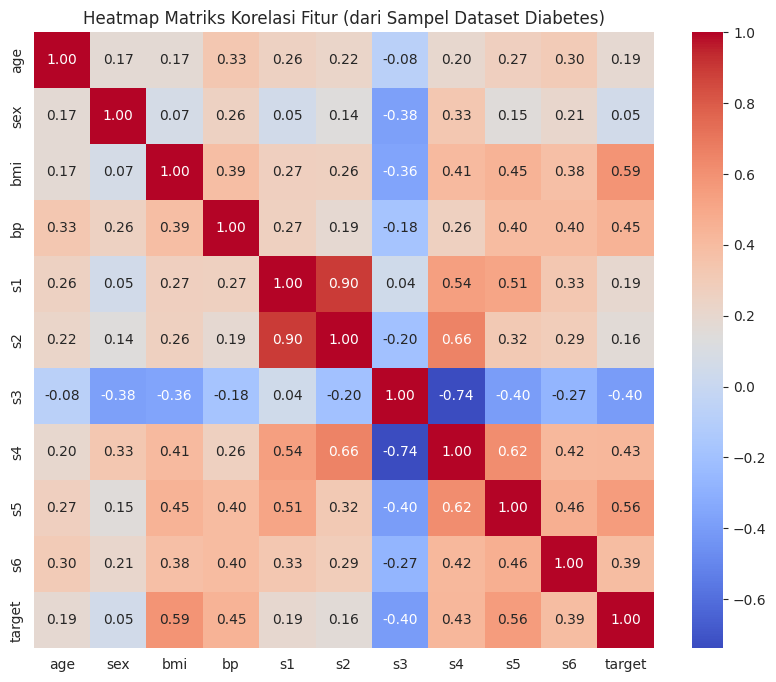

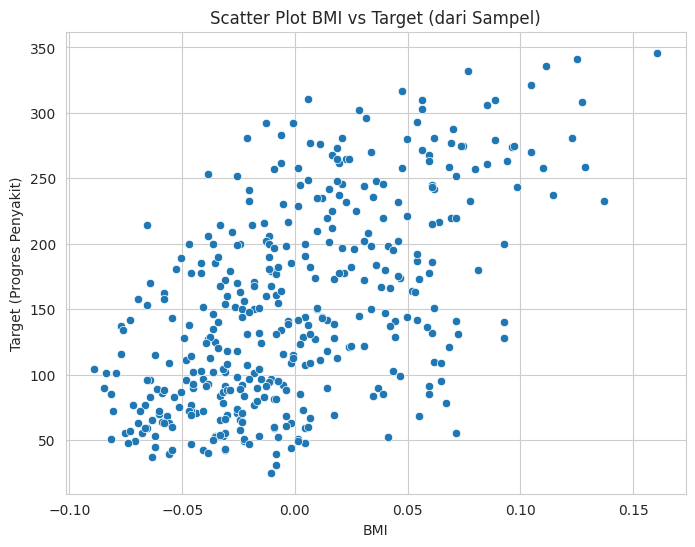

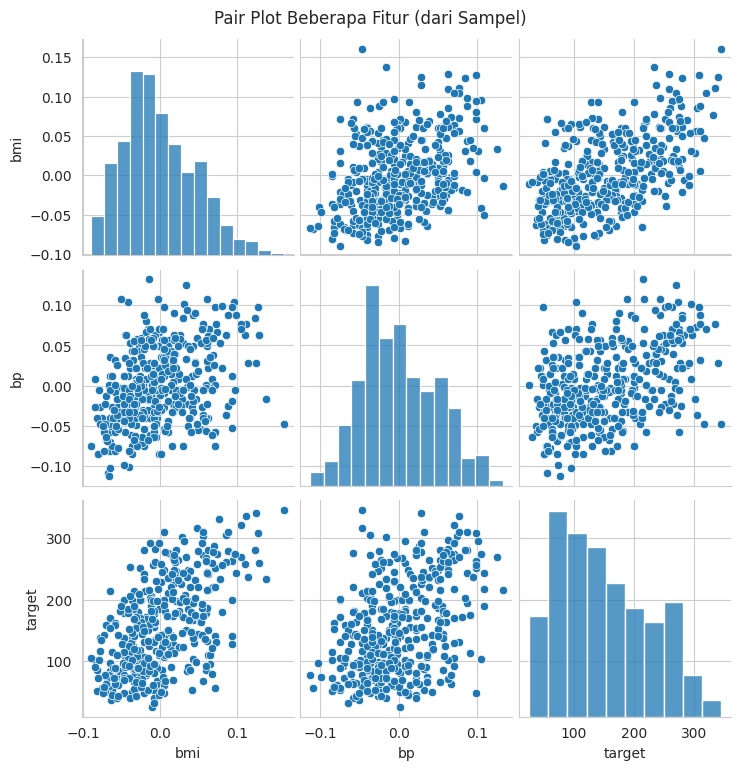

In [8]:
print("\n--- Contoh 4: Analisis Hubungan (Korelasi & Scatter Plot di Sampel) ---")

# Menghitung Matriks Korelasi (Pandas .corr())
# Hanya menghitung korelasi antar kolom numerik.
# Ini cepat di dataset kecil. Di Big Data dengan banyak kolom, matriks ini bisa sangat besar.
correlation_matrix = df.corr()
print("\nMatriks Korelasi antar fitur (Pandas .corr() di Sampel):")
print(correlation_matrix)

# Visualisasi Matriks Korelasi menggunakan Heatmap (Seaborn)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Matriks Korelasi Fitur (dari Sampel Dataset Diabetes)')
plt.show()
# Interpretasi: Nilai mendekati 1 atau -1 menunjukkan hubungan linear kuat.
# Misalnya, 'bmi' dan 's2', 's1' dan 's2' punya korelasi positif kuat di sampel ini.

# Scatter plot antar dua variabel untuk melihat pola hubungan secara visual
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='target', data=df)
plt.title('Scatter Plot BMI vs Target (dari Sampel)')
plt.xlabel('BMI')
plt.ylabel('Target (Progres Penyakit)')
plt.show()
# Interpretasi: Apakah ada tren terlihat? Linear? Non-linear?

# Scatter plot matrix untuk melihat hubungan semua pasangan (untuk jumlah fitur sedikit)
# Sangat lambat/tidak mungkin untuk Big Data dengan banyak fitur.
sns.pairplot(df[['bmi', 'bp', 'target']]) # Hanya subset fitur untuk demo cepat
plt.suptitle('Pair Plot Beberapa Fitur (dari Sampel)', y=1.02)
plt.show()

# --- Koneksi ke Big Data ---
# Menghitung korelasi antar kolom di Big Data menggunakan Spark DataFrame:
# spark_df.stat.corr("bmi", "target") # Korelasi antar dua kolom spesifik
# spark_df.corr('bmi', 'target') # Cara lain di PySpark DataFrame
# spark_df.stat.corr("kolom1", "kolom2", method="pearson") # Bisa pilih metode

# Menghitung matriks korelasi di Big Data:
# Metode .corr() pada Spark DataFrame secara default menghitung matriks korelasi
# spark_df.corr().show() # Menghitung matriks korelasi semua kolom numerik - butuh komputasi M^2 terdistribusi

# Visualisasi heatmap matriks korelasi dari Big Data:
# Hasil spark_df.corr().show() adalah DataFrame yang *mungkin* kecil (jika M tidak terlalu besar).
# Kumpulkan hasilnya ke Pandas dan plot heatmap menggunakan Seaborn seperti di atas.
# Jika jumlah kolom (M) sangat besar, matriks korelasi M x M juga besar.
# Visualisasi Heatmap langsung dari matriks besar itu sulit.
# Solusi: Fokus pada korelasi > threshold tertentu, atau korelasi antar fitur & target saja.

---

**Contoh Program 5: Deteksi Outliers Sederhana (Visual & Filtering Menggunakan Pandas & Seaborn pada Sampel)**

Mendeteksi outliers bisa dilakukan secara visual atau dengan aturan sederhana pada sampel data.


--- Contoh 5: Deteksi Outliers Sederhana (Pandas + Seaborn di Sampel) ---


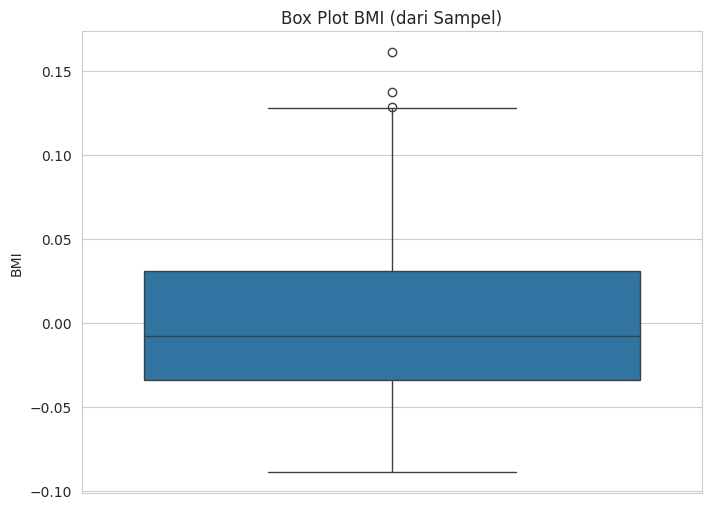

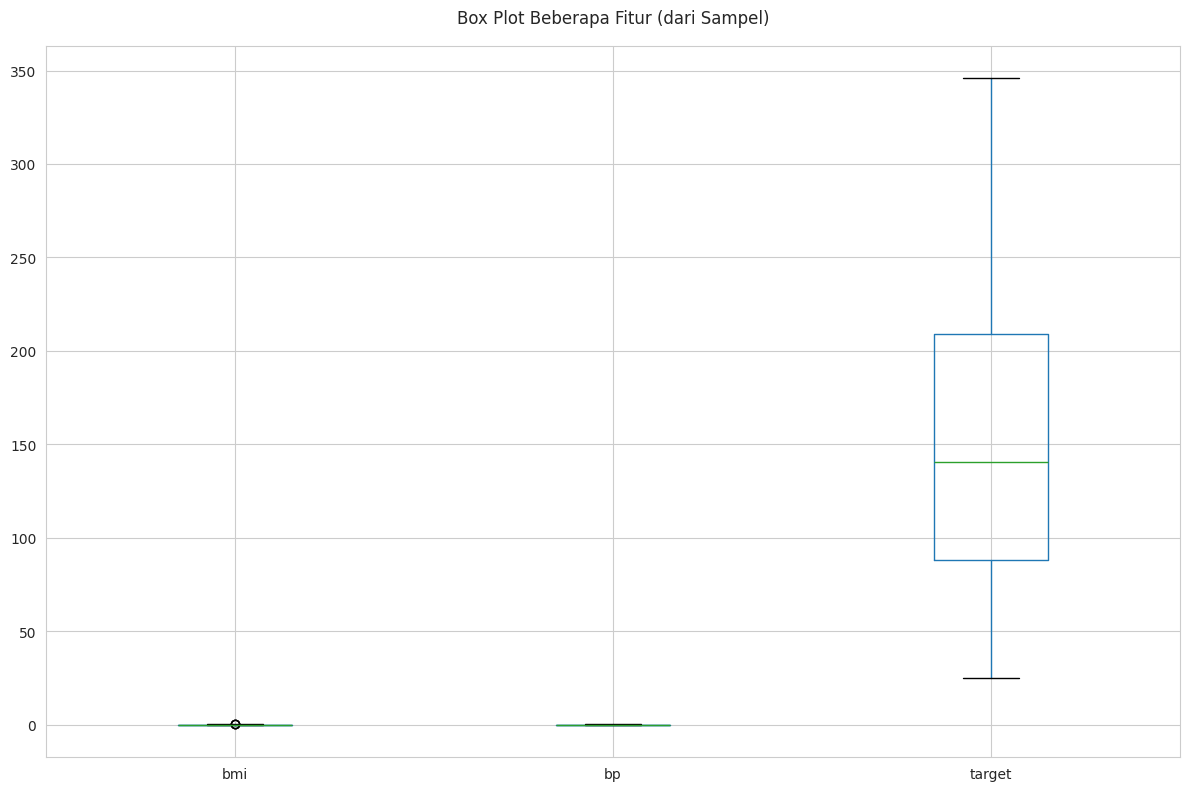


Jumlah outliers BMI di sampel (berdasarkan aturan 1.5*IQR): 3
Contoh outliers BMI di sampel:
          bmi
145  0.128521
256  0.160855
366  0.137143


In [9]:
print("\n--- Contoh 5: Deteksi Outliers Sederhana (Pandas + Seaborn di Sampel) ---")

# Visualisasi Box Plot untuk melihat distribusi dan outliers
# Box plot sangat bagus untuk menunjukkan median, kuartil, dan potensi outliers (titik di luar 'whiskers')
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['bmi'])
plt.title('Box Plot BMI (dari Sampel)')
plt.ylabel('BMI')
plt.show()

# Box plot untuk beberapa fitur sekaligus
plt.figure(figsize=(12, 8))
df[['bmi', 'bp', 'target']].boxplot()
plt.title('Box Plot Beberapa Fitur (dari Sampel)', y=1.02)
plt.tight_layout()
plt.show()

# Deteksi outlier sederhana berdasarkan ambang batas IQR (Interquartile Range) pada sampel
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Ambil data non-outlier (menggunakan aturan 1.5 * IQR)
outlier_threshold_upper = Q3 + 1.5 * IQR
outlier_threshold_lower = Q1 - 1.5 * IQR

outliers_bmi = df[(df['bmi'] > outlier_threshold_upper) | (df['bmi'] < outlier_threshold_lower)]
print(f"\nJumlah outliers BMI di sampel (berdasarkan aturan 1.5*IQR): {len(outliers_bmi)}")
print("Contoh outliers BMI di sampel:")
print(outliers_bmi[['bmi']])

# --- Koneksi ke Big Data ---
# Mendeteksi outliers di Big Data.
# Menghitung Q1, Q3, IQR secara akurat butuh menghitung persentil, yang mahal.
# Gunakan Spark approxQuantile untuk mendapatkan estimasi Q1, Q3 yang efisien.
# Contoh sintaks PySpark (tidak runnable):
# quantiles_bmi = spark_df.approxQuantile("bmi", [0.25, 0.75], 0.01) # 0.01 adalah error toleransi
# Q1_spark = quantiles_bmi[0]
# Q3_spark = quantiles_bmi[1]
# IQR_spark = Q3_spark - Q1_spark
# outlier_upper_spark = Q3_spark + 1.5 * IQR_spark
# outlier_lower_spark = Q1_spark - 1.5 * IQR_spark
# outliers_spark = spark_df.filter((col("bmi") > outlier_upper_spark) | (col("bmi") < outlier_lower_spark))
# outliers_spark.count() # Hitung jumlah outliers di seluruh dataset

# Visualisasi box plot dari Big Data:
# Tidak bisa memplot SEMUA titik. Spark bisa menghitung RINGKASAN untuk box plot (Q1, Median, Q3, Whiskers)
# secara terdistribusi, lalu ringkasan tersebut dikirim ke driver dan divisualisasikan sebagai satu box plot.
# Spark DataFrames .summary() memberikan min, Q1, Median, Q3, Max (bisa digunakan untuk membangun box plot).

---

**Contoh Program 6: Teknik Sampling (Menggunakan Pandas .sample() pada Data yang Dianggap Besar)**

Meskipun dataset `diabetes` kecil, kita bisa mendemonstrasikan konsep sampling menggunakan `.sample()` di Pandas. Di Big Data, sampling dilakukan pada level terdistribusi menggunakan framework seperti Spark.

In [10]:
print("\n--- Contoh 6: Teknik Sampling (Pandas .sample() di Data yang Dianggap Besar) ---")

# Anggap saja 'df' ini adalah keseluruhan data Big Data kita,
# dan kita ingin mengambil sampel acak untuk EDA cepat di Pandas.

# Random Sampling: Ambil 10% dari total baris secara acak
df_sample_random = df.sample(frac=0.1, random_state=42) # random_state agar hasilnya repeatable

print(f"\nUkuran data asli: {len(df)} baris")
print(f"Ukuran sampel acak (10%): {len(df_sample_random)} baris")
print("Sampel acak 5 baris pertama:")
print(df_sample_random.head())

# Stratified Sampling: (Dataset ini tidak punya kolom kategori yang jelas untuk stratifikasi yang meaningful)
# Tapi konsepnya: bagi data berdasarkan nilai di kolom kategori, lalu ambil sampel dari setiap grup.
# Contoh sintaks konseptual jika ada kolom 'gender':
# df_stratified_sample = df.groupby('gender').apply(lambda x: x.sample(frac=0.05, random_state=42)).reset_index(drop=True)
# Penjelasan: Ambil 5% sampel acak dari grup 'Laki-laki' dan 5% dari grup 'Perempuan' secara terpisah.

# --- Koneksi ke Big Data ---
# Sampling di Big Data menggunakan Spark DataFrame:
# Random Sampling:
# spark_df_sample_random = spark_df.sample(fraction=0.1, seed=42) # fraction adalah persentase
# spark_df_sample_random.count() # Menghitung ukuran sampel
# Kemudian bisa kumpulkan sampel ini jika ukurannya kecil:
# df_sample_pandas = spark_df_sample_random.toPandas() # Hati-hati memori!

# Stratified Sampling:
# spark_df_sample_stratified = spark_df.sampleBy("nama_kolom_strata", fractions={"kategori1": 0.05, "kategori2": 0.1}, seed=42)
# spark_df_sample_stratified.groupBy("nama_kolom_strata").count().show() # Cek distribusi strata di sampel

# Penjelasan: Spark mendistribusikan proses pengambilan sampel ke seluruh partisi data.
# Hasil sampling (spark_df_sample_random atau spark_df_sample_stratified)
# adalah DataFrame terdistribusi baru yang bisa diolah lebih lanjut di Spark,
# atau dikumpulkan ke driver untuk analisis detail di Pandas jika ukurannya sudah kecil.


--- Contoh 6: Teknik Sampling (Pandas .sample() di Data yang Dianggap Besar) ---

Ukuran data asli: 442 baris
Ukuran sampel acak (10%): 44 baris
Sampel acak 5 baris pertama:
          age       sex  bmi        bp        s1        s2        s3  \
287  0.045341 -0.044642  NaN -0.015999  0.125019  0.125198  0.019187   
211  0.092564 -0.044642  NaN  0.021872 -0.024960 -0.016658  0.000779   
72   0.063504  0.050680  NaN -0.012556  0.103003  0.048790  0.056003   
321  0.096197 -0.044642  NaN  0.079265  0.054845  0.036577 -0.076536   
73   0.012648  0.050680  NaN -0.002228  0.038334  0.053174 -0.006584   

           s4        s5        s6  target  
287  0.034309  0.032432 -0.005220   219.0  
211 -0.039493 -0.022517 -0.021788    70.0  
72  -0.002592  0.084492 -0.017646   202.0  
321  0.141322  0.098648  0.061054     NaN  
73   0.034309 -0.005142 -0.009362   111.0  


---

**Ringkasan Diagram Alur EDA (Revisit Diagram Akhir Outline)**

Ini adalah diagram yang merangkum bagaimana alat-alat ini (Spark SQL dan Pandas) biasanya berperan dalam alur EDA Big Data:



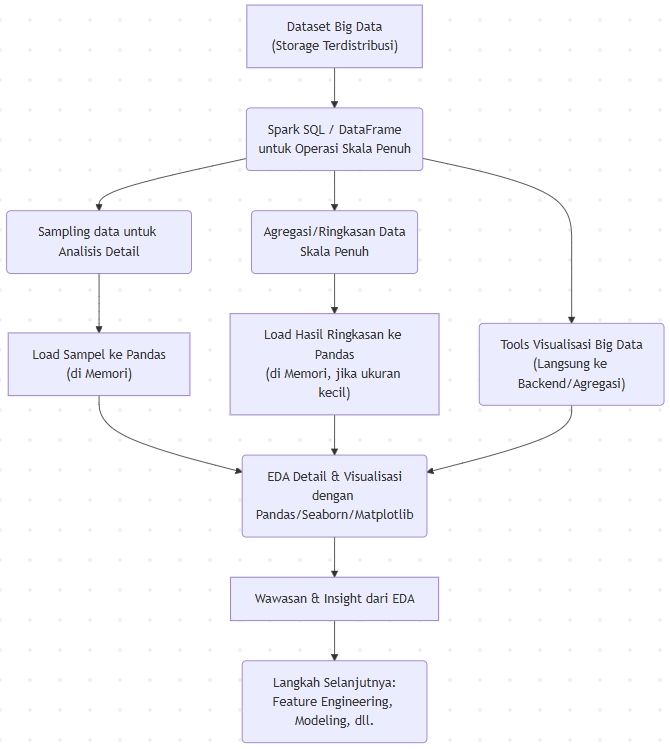

Penjelasan Diagram:

1.  Dataset asli yang besar ada di storage terdistribusi.
2.  **Spark SQL / DataFrame** digunakan untuk interaksi _pertama_ dengan data ini, melakukan operasi yang memerlukan scan data skala penuh seperti perhitungan statistik deskriptif yang akurat, count, filter awal, agregasi, atau mengambil sampel.
3.  Dari Spark, kita bisa mengambil **Sampel** data untuk dianalisis lebih detail di satu mesin.
4.  Atau, kita bisa menghasilkan **Hasil Agregasi/Ringkasan** skala penuh yang ukurannya jauh lebih kecil dari data asli.
5.  Jika **ukuran Sampel** atau **ukuran Hasil Ringkasan** cukup kecil, kita bisa memuatnya ke **Pandas DataFrame** di memori komputer analis.
6.  Menggunakan **Pandas** (bersama library visualisasi seperti **Seaborn/Matplotlib**), kita melakukan EDA yang detail, interaktif, dan membuat visualisasi cepat pada data yang sudah manageable.
7.  Alternatifnya, beberapa **Tools Visualisasi Khusus Big Data** bisa terhubung langsung ke Spark atau storage terdistribusi untuk memvisualisasikan hasil agregasi atau menggunakan teknik rendering khusus.
8.  Semua jalur ini menghasilkan **Wawasan & Insight** dari EDA.
9.  Wawasan ini kemudian menjadi dasar untuk **Langkah Selanjutnya** dalam proyek data science.

----------

Contoh-contoh Python di atas, meskipun dijalankan pada dataset kecil, mendemonstrasikan API dan logika yang sama seperti saat Anda melakukan EDA pada sampel data yang diambil dari Big Data menggunakan Pandas. Bagian 'Koneksi ke Big Data' menjelaskan bagaimana operasi yang sama (tetapi dieksekusi secara terdistribusi) dilakukan menggunakan Spark SQL/DataFrame API pada data skala penuh.

Semoga contoh-contoh ini beserta penjelasannya membantu mahasiswa memahami penerapan praktis dari konsep EDA yang sudah dibahas, serta peran berbagai alat dalam alur kerja Big Data!


<div class="md-recitation">
  Sources
  <ol>
  <li><a href="https://subscription.packtpub.com/book/data/9781789806311/1/ch01lvl1sec10/highlighting-outliers">https://subscription.packtpub.com/book/data/9781789806311/1/ch01lvl1sec10/highlighting-outliers</a></li>
  <li><a href="https://github.com/jaehwan-AI/study">https://github.com/jaehwan-AI/study</a></li>
  </ol>
</div>